### function

In [2]:
#where
# same as a?b:c
import tensorflow as tf
a = tf.constant([1, 2, 3, 1, 1])
b = tf.constant([0, 1, 3, 4, 5])
c = tf.where(tf.greater(a, b), a, b)  # 若a>b，返回a对应位置的元素，否则返回b对应位置的元素
print("c:", c)

c: tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int32)


In [3]:
# random
# 0-1 number
import numpy as np
rdm = np.random.RandomState(seed=1)
a = rdm.rand() # 0-1
b = rdm.rand(2, 3) # 0-1
print("a:", a)
print("b:", b)

a: 0.417022004702574
b: [[7.20324493e-01 1.14374817e-04 3.02332573e-01]
 [1.46755891e-01 9.23385948e-02 1.86260211e-01]]


In [4]:
# 1*2 -> 2*2
import numpy as np
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
c = np.vstack((a, b))
print("c:\n", c)

c:
 [[1 2 3]
 [4 5 6]]


In [8]:
import numpy as np
import tensorflow as tf
# .rabel-> 1-D data
# 生成等间隔数值点
x, y = np.mgrid[1:3:1, 2:4:0.5]
# 2 number, 4 number -> all 2*4 make sure the same
# 将x, y拉直，并合并配对为二维张量，生成二维坐标点
grid = np.c_[x.ravel(), y.ravel()]
print("x:\n", x)
print("y:\n", y)
print("x.ravel():\n", x.ravel())
print("y.ravel():\n", y.ravel())
print('grid:\n', grid)

x:
 [[1. 1. 1. 1.]
 [2. 2. 2. 2.]]
y:
 [[2.  2.5 3.  3.5]
 [2.  2.5 3.  3.5]]
x.ravel():
 [1. 1. 1. 1. 2. 2. 2. 2.]
y.ravel():
 [2.  2.5 3.  3.5 2.  2.5 3.  3.5]
grid:
 [[1.  2. ]
 [1.  2.5]
 [1.  3. ]
 [1.  3.5]
 [2.  2. ]
 [2.  2.5]
 [2.  3. ]
 [2.  3.5]]


### O(n)
layer number = hideen layer number + output layer
all parameter = all w(a*b)+ all b
O(a*b + c*d)

### lr

In [9]:
import tensorflow as tf
w = tf.Variable(tf.constant(5, dtype=tf.float32))
epoch = 40
LR_BASE = 0.2  # 最初学习率
LR_DECAY = 0.99  # 学习率衰减率
LR_STEP = 1  # 喂入多少轮BATCH_SIZE后，更新一次学习率

for epoch in range(epoch):  # for epoch 定义顶层循环，表示对数据集循环epoch次，此例数据集数据仅有1个w,初始化时候constant赋值为5，循环100次迭代。
    # update lr!!!!
    lr = LR_BASE * LR_DECAY ** (epoch / LR_STEP)
    with tf.GradientTape() as tape:  # with结构到grads框起了梯度的计算过程。
        loss = tf.square(w + 1)
    grads = tape.gradient(loss, w)  # .gradient函数告知谁对谁求导

    w.assign_sub(lr * grads)  # .assign_sub 对变量做自减 即：w -= lr*grads 即 w = w - lr*grads
    print("After %s epoch,w is %f,loss is %f,lr is %f" % (epoch, w.numpy(), loss, lr))


After 0 epoch,w is 2.600000,loss is 36.000000,lr is 0.200000
After 1 epoch,w is 1.174400,loss is 12.959999,lr is 0.198000
After 2 epoch,w is 0.321948,loss is 4.728015,lr is 0.196020
After 3 epoch,w is -0.191126,loss is 1.747547,lr is 0.194060
After 4 epoch,w is -0.501926,loss is 0.654277,lr is 0.192119
After 5 epoch,w is -0.691392,loss is 0.248077,lr is 0.190198
After 6 epoch,w is -0.807611,loss is 0.095239,lr is 0.188296
After 7 epoch,w is -0.879339,loss is 0.037014,lr is 0.186413
After 8 epoch,w is -0.923874,loss is 0.014559,lr is 0.184549
After 9 epoch,w is -0.951691,loss is 0.005795,lr is 0.182703
After 10 epoch,w is -0.969167,loss is 0.002334,lr is 0.180876
After 11 epoch,w is -0.980209,loss is 0.000951,lr is 0.179068
After 12 epoch,w is -0.987226,loss is 0.000392,lr is 0.177277
After 13 epoch,w is -0.991710,loss is 0.000163,lr is 0.175504
After 14 epoch,w is -0.994591,loss is 0.000069,lr is 0.173749
After 15 epoch,w is -0.996452,loss is 0.000029,lr is 0.172012
After 16 epoch,w is

### sigmoid : 1/1+e^-x : gradient disapear, time long
### relu : max(x,0) sometimes can't be active, often used
### leaky relu max(ax,x) used not often

### Mse

In [12]:
import tensorflow as tf
import numpy as np
SEED = 23455
rdm = np.random.RandomState(seed=SEED)  # 生成[0,1)之间的随机数
x = rdm.rand(32, 2)
# 32*2
y_ = [[x1 + x2 + (rdm.rand() / 10.0 - 0.05)] for (x1, x2) in x]  # 生成噪声[0,1)/10=[0,0.1); [0,0.1)-0.05=[-0.05,0.05)
# random
x = tf.cast(x, dtype=tf.float32)
# w1 : feature:2, output:1
w1 = tf.Variable(tf.random.normal([2, 1], stddev=1, seed=1))

epoch = 5000
lr = 0.002

for epoch in range(epoch):
    with tf.GradientTape() as tape:
        y = tf.matmul(x, w1)
        # mes!!!! mean of square
        loss_mse = tf.reduce_mean(tf.square(y_ - y))
    grads = tape.gradient(loss_mse, w1)
    # update w1
    w1.assign_sub(lr * grads)

    if epoch % 500 == 0:
        print("After %d training steps,w1 is " % (epoch))
        print(w1.numpy(), "\n")
print("Final w1 is: ", w1.numpy())

After 0 training steps,w1 is 
[[-0.20658986]
 [ 0.00788221]] 

After 500 training steps,w1 is 
[[0.50298166]
 [0.7459474 ]] 

After 1000 training steps,w1 is 
[[0.7584129 ]
 [0.97910804]] 

After 1500 training steps,w1 is 
[[0.85817075]
 [1.0452578 ]] 

After 2000 training steps,w1 is 
[[0.90311074]
 [1.0574758 ]] 

After 2500 training steps,w1 is 
[[0.9275753]
 [1.0533679]] 

After 3000 training steps,w1 is 
[[0.9434762]
 [1.0452478]] 

After 3500 training steps,w1 is 
[[0.95511955]
 [1.0369942 ]] 

After 4000 training steps,w1 is 
[[0.96419907]
 [1.0296872 ]] 

After 4500 training steps,w1 is 
[[0.9714882]
 [1.023513 ]] 

Final w1 is:  [[0.9774035]
 [1.0183977]]


In [ ]:
# define loss
# want to make y larger
# try to make loss smaller !!!!

In [14]:
import tensorflow as tf
import numpy as np

SEED = 23455
COST = 1
PROFIT = 99
rdm = np.random.RandomState(SEED)
x = rdm.rand(32, 2)
y_ = [[x1 + x2 + (rdm.rand() / 10.0 - 0.05)] for (x1, x2) in x]  # 生成噪声[0,1)/10=[0,0.1); [0,0.1)-0.05=[-0.05,0.05)
x = tf.cast(x, dtype=tf.float32)
w1 = tf.Variable(tf.random.normal([2, 1], stddev=1, seed=1))
epoch = 3000
lr = 0.002
for epoch in range(epoch):
    with tf.GradientTape() as tape:
        y = tf.matmul(x, w1)
        # loss: if greater, loss smaller
        # want to make number greater
        loss = tf.reduce_sum(tf.where(tf.greater(y, y_), (y - y_) * COST, (y_ - y) * PROFIT))

    grads = tape.gradient(loss, w1)
    w1.assign_sub(lr * grads)

    if epoch % 500 == 0:
        print("After %d training steps,w1 is " % (epoch))
        print(w1.numpy(), "\n")
print("Final w1 is: ", w1.numpy())

# 自定义损失函数
# 酸奶成本1元， 酸奶利润99元
# 成本很低，利润很高，人们希望多预测些，生成模型系数大于1，往多了预测


After 0 training steps,w1 is 
[[1.3827158]
 [3.462622 ]] 

After 500 training steps,w1 is 
[[1.121139 ]
 [1.0836719]] 

After 1000 training steps,w1 is 
[[1.1115193]
 [1.114956 ]] 

After 1500 training steps,w1 is 
[[1.1605326]
 [1.1575329]] 

After 2000 training steps,w1 is 
[[1.1300945]
 [1.0123466]] 

After 2500 training steps,w1 is 
[[1.1204747]
 [1.0436306]] 

Final w1 is:  [[1.1219323]
 [1.0976768]]


In [16]:
## ce !!
import tensorflow as tf

loss_ce1 = tf.losses.categorical_crossentropy([1, 0], [0.6, 0.4])
loss_ce2 = tf.losses.categorical_crossentropy([1, 0], [0.8, 0.2])
print("loss_ce1:", loss_ce1)
print("loss_ce2:", loss_ce2)
# h2 better, for lower loss

loss_ce1: tf.Tensor(0.5108256, shape=(), dtype=float32)
loss_ce2: tf.Tensor(0.22314353, shape=(), dtype=float32)


### .softmax_cross_entropy_with_logits
softmax + ce

In [17]:
y_ = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0], [0, 1, 0]])
y = np.array([[12, 3, 2], [3, 10, 1], [1, 2, 5], [4, 6.5, 1.2], [3, 6, 1]])
y_pro = tf.nn.softmax(y)
loss_ce1 = tf.losses.categorical_crossentropy(y_,y_pro)
loss_ce2 = tf.nn.softmax_cross_entropy_with_logits(y_, y)

print('分步计算的结果:\n', loss_ce1)
print('结合计算的结果:\n', loss_ce2)

分步计算的结果:
 tf.Tensor(
[1.68795487e-04 1.03475622e-03 6.58839038e-02 2.58349207e+00
 5.49852354e-02], shape=(5,), dtype=float64)
结合计算的结果:
 tf.Tensor(
[1.68795487e-04 1.03475622e-03 6.58839038e-02 2.58349207e+00
 5.49852354e-02], shape=(5,), dtype=float64)


### deal with overfitting
loss + complex regularization

epoch: 0 loss: 0.9357479214668274
epoch: 20 loss: 0.05441431328654289
epoch: 40 loss: 0.030326634645462036
epoch: 60 loss: 0.025496765971183777
epoch: 80 loss: 0.023502906784415245
epoch: 100 loss: 0.02217431366443634
epoch: 120 loss: 0.021319428458809853
epoch: 140 loss: 0.019943276420235634
epoch: 160 loss: 0.018852097913622856
epoch: 180 loss: 0.018248235806822777
epoch: 200 loss: 0.01770571433007717
epoch: 220 loss: 0.01737459935247898
epoch: 240 loss: 0.017194198444485664
epoch: 260 loss: 0.017022008076310158
epoch: 280 loss: 0.016886098310351372
epoch: 300 loss: 0.016781089827418327
epoch: 320 loss: 0.01662573404610157
epoch: 340 loss: 0.01652849279344082
epoch: 360 loss: 0.01647970639169216
epoch: 380 loss: 0.01642131619155407
*******predict*******


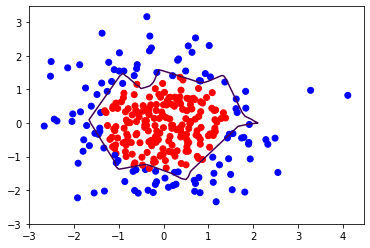

In [18]:
# 导入所需模块
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# 读入数据/标签 生成x_train y_train
df = pd.read_csv('dot.csv')
x_data = np.array(df[['x1', 'x2']])
y_data = np.array(df['y_c'])

x_train = np.vstack(x_data).reshape(-1,2)
y_train = np.vstack(y_data).reshape(-1,1)

Y_c = [['red' if y else 'blue'] for y in y_train]

# 转换x的数据类型，否则后面矩阵相乘时会因数据类型问题报错
x_train = tf.cast(x_train, tf.float32)
y_train = tf.cast(y_train, tf.float32)

# from_tensor_slices函数切分传入的张量的第一个维度，生成相应的数据集，使输入特征和标签值一一对应
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)

# 生成神经网络的参数，输入层为2个神经元，隐藏层为11个神经元，1层隐藏层，输出层为1个神经元
# 用tf.Variable()保证参数可训练
w1 = tf.Variable(tf.random.normal([2, 11]), dtype=tf.float32)
b1 = tf.Variable(tf.constant(0.01, shape=[11]))

w2 = tf.Variable(tf.random.normal([11, 1]), dtype=tf.float32)
b2 = tf.Variable(tf.constant(0.01, shape=[1]))

lr = 0.01  # 学习率
epoch = 400  # 循环轮数

# 训练部分
for epoch in range(epoch):
    # back 
    for step, (x_train, y_train) in enumerate(train_db):
        # forward
        with tf.GradientTape() as tape:  # 记录梯度信息
            h1 = tf.matmul(x_train, w1) + b1  # 记录神经网络乘加运算
            # active then to next
            h1 = tf.nn.relu(h1)
            y = tf.matmul(h1, w2) + b2

            # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss = tf.reduce_mean(tf.square(y_train - y))

        # 计算loss对各个参数的梯度
        variables = [w1, b1, w2, b2]
        grads = tape.gradient(loss, variables)

        # 实现梯度更新
        # w1 = w1 - lr * w1_grad tape.gradient是自动求导结果与[w1, b1, w2, b2] 索引为0，1，2，3 
        w1.assign_sub(lr * grads[0])
        b1.assign_sub(lr * grads[1])
        w2.assign_sub(lr * grads[2])
        b2.assign_sub(lr * grads[3])

    # 每20个epoch，打印loss信息
    if epoch % 20 == 0:
        print('epoch:', epoch, 'loss:', float(loss))

# 预测部分
print("*******predict*******")
# xx在-3到3之间以步长为0.01，yy在-3到3之间以步长0.01,生成间隔数值点
xx, yy = np.mgrid[-3:3:.1, -3:3:.1]
# 将xx , yy拉直，并合并配对为二维张量，生成二维坐标点
grid = np.c_[xx.ravel(), yy.ravel()]
grid = tf.cast(grid, tf.float32)
# 将网格坐标点喂入神经网络，进行预测，probs为输出
probs = []
for x_test in grid:
    # 使用训练好的参数进行预测
    h1 = tf.matmul([x_test], w1) + b1
    h1 = tf.nn.relu(h1)
    y = tf.matmul(h1, w2) + b2  # y为预测结果
    probs.append(y)

# 取第0列给x1，取第1列给x2
x1 = x_data[:, 0]
x2 = x_data[:, 1]
# probs的shape调整成xx的样子
probs = np.array(probs).reshape(xx.shape)
plt.scatter(x1, x2, color=np.squeeze(Y_c)) #squeeze去掉纬度是1的纬度,相当于去掉[['red'],[''blue]],内层括号变为['red','blue']
# 把坐标xx yy和对应的值probs放入contour<[‘kɑntʊr]>函数，给probs值为0.5的所有点上色  plt点show后 显示的是红蓝点的分界线
plt.contour(xx, yy, probs, levels=[.5])
plt.show()

# 读入红蓝点，画出分割线，不包含正则化
# 不清楚的数据，建议print出来查看 

### optimization

In [ ]:
# SGD 
loss = tf.reduce_mean(tf.square(y_ - y))  # 采用均方误差损失函数mse = mean(sum(y-out)^2)
        # 计算loss对各个参数的梯度
grads = tape.gradient(loss, [w1, b1])

        # 实现梯度更新 w1 = w1 - lr * w1_grad    b = b - lr * b_grad
w1.assign_sub(lr * grads[0])  # 参数w1自更新
b1.assign_sub(lr * grads[1])  # 参数b自更新

In [ ]:
# SGDM
m_w, m_b = 0, 0
beta = 0.9
# sgd-momentun  
# sub grades + m_w
m_w = beta * m_w + (1 - beta) * grads[0]
m_b = beta * m_b + (1 - beta) * grads[1]
w1.assign_sub(lr * m_w)
b1.assign_sub(lr * m_b)

In [ ]:
# adagrad
v_w, v_b = 0, 0
v_w += tf.square(grads[0]) # sum of square
v_b += tf.square(grads[1])
w1.assign_sub(lr * grads[0] / tf.sqrt(v_w)) # /sqrt(sum of squre)
b1.assign_sub(lr * grads[1] / tf.sqrt(v_b))

In [ ]:
#RMSProp
v_w, v_b = 0, 0
beta = 0.9
v_w = beta * v_w + (1 - beta) * tf.square(grads[0]) # use square, not just
v_b = beta * v_b + (1 - beta) * tf.square(grads[1])
w1.assign_sub(lr * grads[0] / tf.sqrt(v_w))
b1.assign_sub(lr * grads[1] / tf.sqrt(v_b))

In [ ]:
#adam
m_w = beta1 * m_w + (1 - beta1) * grads[0]
m_b = beta1 * m_b + (1 - beta1) * grads[1]
v_w = beta2 * v_w + (1 - beta2) * tf.square(grads[0])
v_b = beta2 * v_b + (1 - beta2) * tf.square(grads[1])

m_w_correction = m_w / (1 - tf.pow(beta1, int(global_step)))
m_b_correction = m_b / (1 - tf.pow(beta1, int(global_step)))
v_w_correction = v_w / (1 - tf.pow(beta2, int(global_step)))
v_b_correction = v_b / (1 - tf.pow(beta2, int(global_step)))

w1.assign_sub(lr * m_w_correction / tf.sqrt(v_w_correction))
b1.assign_sub(lr * m_b_correction / tf.sqrt(v_b_correction))